<a href="https://colab.research.google.com/github/Labo-Lacourse/Code_chap_23_logistic_regression_regularization/blob/master/Code%20en%20fran%C3%A7ais/Analyse_(Colab_R_magic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ne pas oubliez de se connecter à l'environnement d'exécution (en haut à gauche).


# Algorithmes d’apprentissage et modèles statistiques
## Un exemple de régression logistique régularisée et de validation croisée pour prédire le décrochage scolaire
##Code des analyses présentées dans la partie 2 du chapitre 23: régression logistique régularisée
### Dans M. Corbière & N. Larivière (Eds.), Méthodes qualitatives, quantitatives et mixtes dans la recherche en sciences humaines, sociales et de la santé, 2e édition. Québec, QC : PUQ. (sous presse)
Contact: eric.lacourse@umontreal.ca
### Auteurs: Éric Lacourse, Charles-Édouard Giguère et Véronique Dupéré
#### Analyste: Charles-Édouard Giguère
#### Transcription du code: Clémentine Courdi



###2.1. Description de l’échantillon, du devis et des variables

2.1.1. Échantillon

Les données ont été recueillies initialement auprès de n = 6773 d’adolescents provenant de 12 écoles où le taux de décrochage est particulièrement élevé, autour de 36%, afin de mesurer un ensemble de facteurs de risque du décrochage scolaire. Au total, 10 des 12 écoles étaient situées dans des quartiers défavorisés. Un sous-échantillon a par la suite été invité à une entrevue afin d’établir les stresseurs auxquels les adolescents étaient exposés. L’objectif était d’interviewer 45 adolescents par école (pour un total de n = 545), suivant un devis avec cas témoins appariés. D’abord, 15 élèves qui venaient de décrocher de l’école ont été interviewés. Ensuite, 15 élèves appariés ayant un profil initial de risques similaire, mais qui persévéraient ont également été interviewés. Finalement, 15 autres élèves « normatifs », également persévérants, qui avaient un niveau moyen de risque ont été interviewés.

2.1.2. Variables

La variable dépendante est une variable dichotomique (codée 0 = non/1 = oui) représentant le fait qu’un élève a décroché de l’école ou non. Un élève est considéré comme décrocheur s’il remplit au moins une des trois conditions suivantes : 1) avoir avisé officiellement de la cessation de ses études avant d’obtenir son diplôme d’études secondaires ou DES, 2) avoir été transféré au système d’éducation aux adultes, 3) être absent pendant plus d’un mois de l’école sans avoir avisé la direction des motivations sous-jacentes. Pour plus de détails sur les variables et le devis, voir l’article original de Dupéré et al. (2018)
Une particularité de la structure des données est que la grande proportion des variables sont ordinales et recodées en variables factices (dummy) dichotomiques. En général, les effets de la régulation sont plus marqués : 1) avec des variables intervalles/ratio puisqu’elles ont une plus grande variance et 2) en présence de multicollinéarité. Une autre caractéristique des données est que nous ne sommes pas en contexte de haute dimensionnalité puisque nous avons 25 variables pour 1000 participants, donc p << n.  En dernier lieu, l’étude originale est de nature confirmatoire (hypothético-déductive) et non exploratoire (inductive), ce qui favorisera les algorithmes les moins flexibles, comme la régression logistique « classique ».  


Description des variables indépendantes introduites dans le modèle de régression logistique régularisée provenant de l’étude de Dupéré et al. (2018)


Nom des variables |	Types de variables | Nom des variables dans le fichier de données
---|---|---
  Sexe |Dichotomique|	MALE
  Âge	|	Intervalle |	AGE
  Parent immigré	|	Dichotomique	|	PAR_IMM
  Ethnicité	|	Dichotomique	|	MINORITY
  Niveau de scolarité parents	|	Intervalle	|		SCOLMAX
  Mère en emploi|		Dichotomique|		TRAVAILM
  Père en emploi	|	Dichotomique	|		TRAVAILP
  Parents séparés	|		Dichotomique	|		PAR_SEP
  Adaptation scolaire	|	Intervalle	|		ADAPT
  Risque décrochage scolaire	|		Intervalle	|		SRDQ
  Difficultés chroniques sévères	|		Intervalle	|		CHRONSEVACT
  Stresseurs sévères 0-3 mois	|		Dichotomique	|		SEVER03DICO
  Stresseurs sévères 3-6 mois	|		Dichotomique	|	SEVER36DICO
  Stresseurs sévères 6-9 mois|		Dichotomique	|		SEVER69DICO
  Stresseurs sévères 9-12 mois	|		Dichotomique	|	SEVER912DICO
  Stresseurs modérés 0-3 mois	|	Dichotomique	|	MODER203DICO
  Stresseurs modérés 3-6 mois	|	Dichotomique	|	MODER236DICO
  Stresseurs modérés 6-9 mois	|	Dichotomique	|	MODER269DICO
  Stresseurs modérés 9-12 mois|		Dichotomique	|	MODER2912DICO
  Stresseurs faibles 0-3 mois	|	Dichotomique	|	LOW203DICO
  Stresseurs faibles 3-6 mois	|	Dichotomique	|	LOW236DICO
  Stresseurs faibles 6-9 mois	|	Dichotomique	|	LOW269DICO
  Stresseurs faibles 9-12 mois |	Dichotomique	|	LOW2912DICO
  Stresseurs distaux sévères|		Intervalle/ratio|		EVDISTSEV
  Stresseurs distaux modérés|		Intervalle/ratio|		EVDISTMOD


###2.2. Objectifs de l’analyse 

L’objectif principal de cette analyse est de sélectionner un modèle de régression logistique, de manière exploratoire/inductive, en utilisant des techniques qui sont particulières à l’apprentissage automatique afin de potentiellement prédire le décrochage scolaire avec la plus grande justesse prédictive possible à partir des 25 variables indépendantes. Nous utilisons des données simulées à partir de l’échantillon initial.

En résumé, la tâche de classification consiste à trouver à la fois le nombre optimal de prédicteurs du décrochage scolaire et l’algorithme de régularisation qui permettra le meilleur ajustement du modèle aux données, compte tenu de la spécificité des variables introduites dans le modèle.


###2.3. et 2.4 Régression logistique régularisée : procédures et modèles + interprétations et taleaux de résultats

La suite du document montre le code utilisé (originalement dans le logiciel RStudio) pour la sélection du modèle conformément aux procédures décrites dans la partie 2.3 et aux résultats montrés dans la partie 2.4 du chapitre


In [17]:
# Activer R magic pour pouvoir utiliser le code R via Google Colab
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [18]:
#Télécharger les fichiers du dépôt github contenant l'ensemble de données sur lequel porte les analyses
!git clone https://github.com/Labo-Lacourse/Code_chap_23_logistic_regression_regularization.git

fatal: destination path 'Code_chap_23_logistic_regression_regularization' already exists and is not an empty directory.


In [19]:
#Lire le fichier de données téléchargé depuis github (vérification du téléchargement)
import pandas as pd
SD = pd.read_csv('Code_chap_23_logistic_regression_regularization/SD.csv') 
print(SD.head(5))

   Unnamed: 0  ID  ECOLE  ...  LOW269DICO  LOW2912DICO  CHRONSEVACT
0         367   1     14  ...           0            0            0
1         368   2     14  ...           1            1            1
2         369   3     14  ...           1            1            0
3         370   4     14  ...           1            1            0
4         371   5     14  ...           0            0            1

[5 rows x 36 columns]


In [20]:
%%R #Activer code R pour la cellule

#Téléchargement des packages nécessaire à l'analyse
install.packages("CUFF") #Package CUFF (Charles's Utility Function using Formula) pour affichage des variables
install.packages ("dplyr") #Package dplyr pour manipulation flexible des données
install.packages("ggplot2")#Package ggplot2 pour création de graphiques 
install.packages("haven") #Package haven pour importer des données d'autres formats dans R
install.packages("knitr") #Package knitr pour production de tableau
install.packages("xtable") #Package xtable pour production de tableau
install.packages("pairwise") #Package pour fonction ftab

require(dplyr, quietly = TRUE, warn.conflicts = FALSE) 
require(ggplot2, quietly = TRUE, warn.conflicts = FALSE) 
require(CUFF, quietly = TRUE, warn.conflicts = FALSE) 
require(haven, quietly = TRUE, warn.conflicts = FALSE)
require(knitr, quietly = TRUE, warn.conflicts = FALSE)
require(xtable, quietly = TRUE, warn.conflicts = FALSE)
require(pairwise, quietly = TRUE, warn.conflicts = FALSE) 

opts_chunk$set(echo = TRUE, prompt = TRUE, comment = "", cache = TRUE)
options(xtable.comment = FALSE)


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/CUFF_1.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 19832 bytes (19 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [21]:
%%R

install.packages("glmnet") #Package pour régression linéaire avec régularisation
install.packages("latex2exp") #Package pour fonction kable utilisé à la fin du code

require(glmnet)
require(latex2exp)


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/glmnet_4.1-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2154483 bytes (2.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [22]:
%%R #Activer code R pour la cellule

#Lire le fichier de données téléchargé depuis github (vérification du téléchargement des données et des packages)
library(readr)
SD.df <- read_csv("Code_chap_23_logistic_regression_regularization/SD.csv")
ls(SD.df)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.

 [1] "ADAPT"         "AGE"           "AIMES"         "AMB"          
 [5] "CHRONSEVACT"   "DOUBLE"        "ECOLE"         "EVDISTMOD"    
 [9] "EVDISTSEV"     "ID"            "IMP"           "LOW203DICO"   
[13] "LOW236DICO"    "LOW269DICO"    "LOW2912DICO"   "MALE"         
[17] "MINORITY"      "MODER203DICO"  "MODER236DICO"  "MODER269DICO" 
[21] "MODER2912DICO" "NOTES_FR"      "NOTES_MATH"    "PAR_IMM"      
[25] "PAR_SEP"       "PR_AUTRES"     "SCOLMAX"       "SEVER03DICO"  
[29] "SEVER36DICO"   "SEVER69DICO"   "SEVER912DICO"  "SRDQ"         
[33] "STATUT"        "TRAVAILM"      "TRAVAILP"      "X1"           


###Développement des modèles à partir de l'échantillon d'entrainement

On doit idéalement éviter le sur- ou le sous-apprentissage, c’est-à-dire d’avoir une excellente classification au sein de l’échantillon d’entraînement, mais une mauvaise classification avec de nouvelles données . Une solution pour éviter ce problème est de diviser aléatoirement l’échantillon en deux parties, 70% de données d’entraînement et 30% de données « test » (soit des nouvelles données). Cette proportion est un peu arbitraire, mais l’idée est de garder un échantillon d’entraînement le plus grand possible pour pouvoir développer un modèle tout en ayant un échantillon « test » assez grand pour valider le modèle. 

Ainsi, l’échantillon est séparé en deux sous-échantillons:
1. Fichier d’entraînement (TRAIN.df ; N = 700) 
2. Fichier de test (TEST.df ; N = 300)

In [23]:
%%R #Activer code R pour la cellule

#Diviser l'ensemble de données pour créer un sous-ensemble de données d'entrainement et un sous-ensemble de données de test (avec germe aléatoire pour assurer la reproductibilité des résultats)
set.seed(1234)
ECH.TRAIN <- sample(1:1000, 700)
TRAIN.df <- SD.df[ECH.TRAIN,]
TEST.df <- SD.df[-ECH.TRAIN,]

In [24]:
%%R
#Fixer les sous-ensemble de données comme "data frames"
TRAIN.df <- as.data.frame(TRAIN.df)
TEST.df <- as.data.frame(TEST.df)

Les variables des deux fichiers sont centrées et échelonnées sauf les trois premières variables: ID, ECOLE, et STATUT.

In [25]:
%%R

#Standardisation des variables
TRAIN.df[,-(2:4)]  <- scale(TRAIN.df[,-(2:4)])
TEST.df[,-(2:4)]  <- scale(TEST.df[,-(2:4)])

In [26]:
%%R 

#Lire l'ensemble de données d'entrainement pour vérifier la réussite de l'étape précédente
ls (TRAIN.df)

 [1] "ADAPT"         "AGE"           "AIMES"         "AMB"          
 [5] "CHRONSEVACT"   "DOUBLE"        "ECOLE"         "EVDISTMOD"    
 [9] "EVDISTSEV"     "ID"            "IMP"           "LOW203DICO"   
[13] "LOW236DICO"    "LOW269DICO"    "LOW2912DICO"   "MALE"         
[17] "MINORITY"      "MODER203DICO"  "MODER236DICO"  "MODER269DICO" 
[21] "MODER2912DICO" "NOTES_FR"      "NOTES_MATH"    "PAR_IMM"      
[25] "PAR_SEP"       "PR_AUTRES"     "SCOLMAX"       "SEVER03DICO"  
[29] "SEVER36DICO"   "SEVER69DICO"   "SEVER912DICO"  "SRDQ"         
[33] "STATUT"        "TRAVAILM"      "TRAVAILP"      "X1"           


In [27]:
%%R 

#Lire l'ensemble de données de test pour vérifier la réussite de l'étape précédente
ls (TEST.df)

 [1] "ADAPT"         "AGE"           "AIMES"         "AMB"          
 [5] "CHRONSEVACT"   "DOUBLE"        "ECOLE"         "EVDISTMOD"    
 [9] "EVDISTSEV"     "ID"            "IMP"           "LOW203DICO"   
[13] "LOW236DICO"    "LOW269DICO"    "LOW2912DICO"   "MALE"         
[17] "MINORITY"      "MODER203DICO"  "MODER236DICO"  "MODER269DICO" 
[21] "MODER2912DICO" "NOTES_FR"      "NOTES_MATH"    "PAR_IMM"      
[25] "PAR_SEP"       "PR_AUTRES"     "SCOLMAX"       "SEVER03DICO"  
[29] "SEVER36DICO"   "SEVER69DICO"   "SEVER912DICO"  "SRDQ"         
[33] "STATUT"        "TRAVAILM"      "TRAVAILP"      "X1"           


Par la suite, l’échantillon d’entraînement est aussi divisé aléatoirement en dix sous-échantillons de 70 unités pour permettre la validation croisée à k plis ainsi que la sélection du paramètre alpha ou lambda afin de permettre une régularisation adéquate.  

In [28]:
%%R

#Les partitions et la fonction crossval sont construites afin de préparer la validation croisée.
#Division des données d'entrainement en 10 groupes de 70 individus (observations)
PARTITION = sample(rep(1:10, rep(70,10)),700)

#Création de la fonction crossval pour la validation croisée à 10-plis 
crossval <- function(mod){
    f1 <- function(x){
        modi = update(mod, data = TRAIN.df[!(PARTITION %in% x),])
        table(1*(predict(modi, newdata = TRAIN.df[PARTITION %in% x,],
                         type = "resp")>0.5),
              TRAIN.df[(PARTITION %in% x),"STATUT"])
    }
 CVT <- mapply(f1, x = 1:10)
    as.table(matrix(apply(CVT, 1, sum), 2, 2,
                    dimnames = list(c("P.ND","P.D"),
                                    c("T.ND","T.D"))))
}   

Une manière adéquate de commencer les analyses est d’estimer un modèle de régression logistique « classique » en utilisant les 25 prédicteurs. En premier lieu, les données de notre échantillon seront donc modélisées à partir d’une régression logistique « classique ». Les 25 variables standardisées, potentiellement associées au décrochage, sont introduites dans le modèle.

In [29]:
%%R

#Un modèle additif (sans régularisation) de régression logistique est ajusté sur l’échantillon d’entraînement.
#Régression logistique classique; données d’entraînement
var.model <- c("MALE", "AGE", "PAR_IMM", "MINORITY", "SCOLMAX", "TRAVAILM", "TRAVAILP", "PAR_SEP", "ADAPT",
                "SRDQ", "EVDISTSEV", "EVDISTMOD","SEVER03DICO",
                "SEVER36DICO", "SEVER69DICO", "SEVER912DICO",
                "MODER203DICO", "MODER236DICO", "MODER269DICO",
                "MODER2912DICO", "LOW203DICO", "LOW236DICO",
                "LOW269DICO", "LOW2912DICO", "CHRONSEVACT")
glm1 <- glmnet(x = TRAIN.df[, var.model] %>% as.matrix, y = TRAIN.df[,"STATUT"], lambda=0, family = "binomial")

#Visualisation des résultats 
print(glm1)
predict(glm1, type="coef", "lambda.min", allCoef = TRUE)



Call:  glmnet(x = TRAIN.df[, var.model] %>% as.matrix, y = TRAIN.df[,      "STATUT"], family = "binomial", lambda = 0) 

  Df  %Dev Lambda
1 25 16.07      0
26 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)    0.01223880
MALE           0.11619607
AGE            0.37832290
PAR_IMM       -0.02354991
MINORITY       0.01117619
SCOLMAX        0.28359589
TRAVAILM       0.11628193
TRAVAILP      -0.10514515
PAR_SEP        0.54567272
ADAPT         -0.12379524
SRDQ          -0.04120007
EVDISTSEV      0.26398912
EVDISTMOD     -0.49879199
SEVER03DICO    0.43484789
SEVER36DICO   -0.06016151
SEVER69DICO   -0.45572581
SEVER912DICO  -0.01289725
MODER203DICO  -0.36817345
MODER236DICO   0.36277321
MODER269DICO   0.44343925
MODER2912DICO  0.09907921
LOW203DICO     0.25546687
LOW236DICO     0.12153723
LOW269DICO    -0.23443896
LOW2912DICO   -0.17378213
CHRONSEVACT    0.60983017


In [32]:
%%R

#Prédiction à l'aide de la régression logistique classique
glm1p <- predict(glm1, newx = TRAIN.df[,var.model] %>%
                  as.matrix, s = "lambda.min")

#Table de classification montrant la performance prédictive du modèle (fréquences, puis proportions)
cv0 <- table(1*(glm1p>0), TRAIN.df$STATUT)
cv0
prop.table(cv0)*100


   
           0        1
  0 35.00000 15.00000
  1 14.85714 35.14286


In [34]:
%%R
#Résumé du pourcentage de bonnes classifications
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv0)))*100)

[1] "70.1% de bonne classification"


Nous pouvons constater que **70,1% des participants** sont bien classés en utilisant l’échantillon d’entraînement et la validation croisée à 10-plis pour la régression linéaire classique.

Passons maintenant aux modèles avec régularisation.

La régularisation ou estimateurs par rétrécissement consiste à pénaliser la fonction objective (moindre carré) servant à estimer les coefficients. Essentiellement, il s’agit d’estimer les coefficients en donnant une pénalité de façon à réduire la dimension de la régression. Une régression OLS aura p paramètres à estimer. Une régression avec régularisation aura un nombre de degrés de liberté inférieur à p permettant d’avoir un modèle linéairement plus parcimonieux. Pour estimer les coefficients d’un modèle régularisé, on utilise la fonction objective suivante:

>$RSS_{shrinkage} = (Y − BX) + λf(B)$

Nous utilisons trois méthodes correspondant à trois pénalités :

1.La méthode de régularisation de Ridge utilise une pénalité quadratique.

>$RSS_{shrinkage} =(Y −BX)+λ \sum_{i=1}^p \ β_i^2 $


2.La méthode du Lasso utilise une pénalité en valeur absolue.
Cette pénalité fait en sorte que si un coefficient est à 0 pour un λ donné il restera fixé à 0 pour tout les λ∗ > λ.

>$RSS_{shrinkage} = (Y −BX)+λ \sum_{i=1}^p \ |β_i|  $


3.La méthode de régularisation elastic net utilise un mélange de deux pénalités.
Cette méthode introduit un nouveau paramètre (α) à estimer dans le modèle. En utilisant la paramétrisation suivante, on obtient que α = 0 correspond à une régression de Ridge et α = 1 correspond à une régression de lasso. Un alpha entre 0 et 1 produit un mélange des deux pénalités.

>$RSS_{shrinkage} = (Y −BX)+ + (1 − α) (λ \sum_{i=1}^p \ β_i^2 )  + (α) ( λ \sum_{i=1}^p \ |β_i|  ) $



Commençons par essayer la régression logistique avec la régularisation ridge.

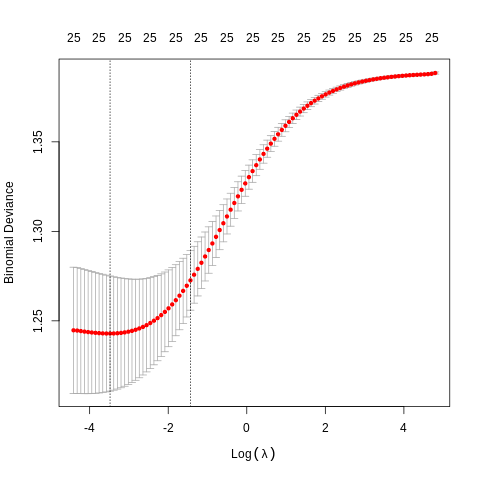

In [35]:
%%R

##Régression logistique avec régularisation ridge
#Sélection du lambda par validation croisée à 10 plis
var.model <- c("MALE", "AGE", "PAR_IMM", "MINORITY", "SCOLMAX", "TRAVAILM", "TRAVAILP", "PAR_SEP", "ADAPT",
                "SRDQ", "EVDISTSEV", "EVDISTMOD","SEVER03DICO",
                "SEVER36DICO", "SEVER69DICO", "SEVER912DICO",
                "MODER203DICO", "MODER236DICO", "MODER269DICO",
                "MODER2912DICO", "LOW203DICO", "LOW236DICO",
                "LOW269DICO", "LOW2912DICO", "CHRONSEVACT")

cv.glmn1 <- cv.glmnet(x= TRAIN.df[,var.model] %>% as.matrix,
                      y = TRAIN.df[,"STATUT"], alpha = 0, nfolds = 10, 
                      foldid = PARTITION, intercept= TRUE, 
                      family = "binomial", standardize = TRUE)

#Visualisation des résultats de la validation croisée avec régularisation ridge (valeur de lambda optimale indiquée par les lignes verticales pointillées)
plot(cv.glmn1)

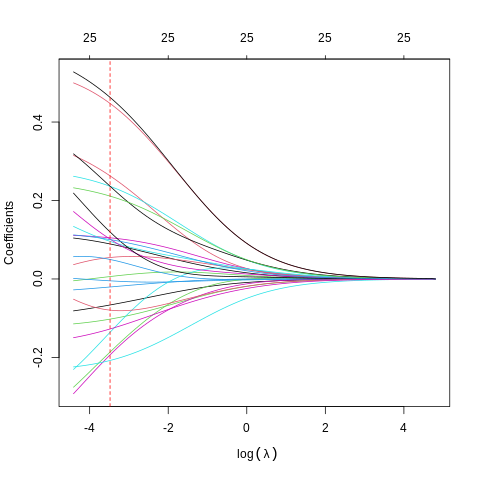

In [36]:
%%R

##Régression logistique avec régularisation ridge 
glmn1.0 <- glmnet(x = TRAIN.df[, var.model] %>% as.matrix,
                  y = TRAIN.df[,"STATUT"], alpha = 0, family = "binomial")

#Visualisation: évolution des coefficients selon valeur de lambda avec régularisation ridge + ligne rouge indiquant le lambda optimal
plot(glmn1.0, xvar = "lambda", label = FALSE, xlab = ~ log(lambda))
abline( v = log(cv.glmn1$lambda.min), col = "red", lty = 2)

La validation croisé a été appliquée pour trouver le paramètre lambda. On fait une prédiction basée sur ce modèle, mais la généralisation de la prédiction selon ce modèle sera confirmée à l’aide de l’échantillon de test.

In [39]:
%%R

#Prédiction à l'aide de la régression logistique avec régularisation ridge
glmn1p <- predict(cv.glmn1, newx = TRAIN.df[,var.model] %>%
                    as.matrix, s = "lambda.min") 

#Table de classification montrant la performance prédictive du modèle
cv2 <- table(1*(glmn1p>0), TRAIN.df$STATUT)
cv2
prop.table(cv2)*100


   
           0        1
  0 34.71429 14.28571
  1 15.14286 35.85714


In [40]:
%%R
#Résumé du pourcentage de bonnes classifications
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv2)))*100)

[1] "70.6% de bonne classification"


On passe maintenant à la régularisation lasso.


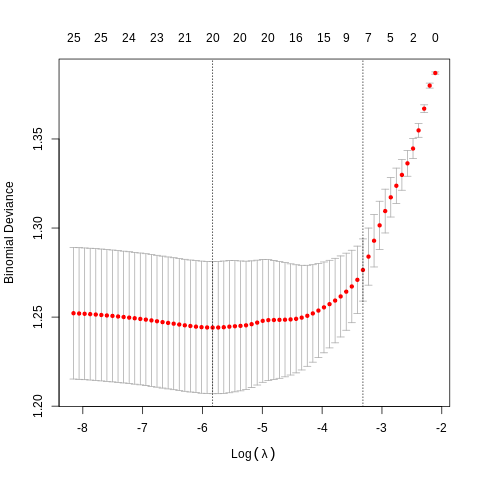

In [41]:
%%R

##Régression logistique avec régularisation ridge
#Sélection du lambda par validation croisée à 10 plis
cv.glmn2 <- cv.glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
                    y = TRAIN.df[,"STATUT"], alpha = 1, nfolds = 10,
                    foldid = PARTITION, family = "binomial")

glmn2 <- glmnet(x = TRAIN.df[,var.model] %>%
                as.matrix, y = TRAIN.df[,"STATUT"], alpha = 1, family = "binomial",
                lambda = cv.glmn2$lambda.min)

#Visualisation des résultats de la validation croisée avec régularisation lasso (valeur de lambda optimale indiquée par les lignes verticales pointillées)
plot(cv.glmn2)

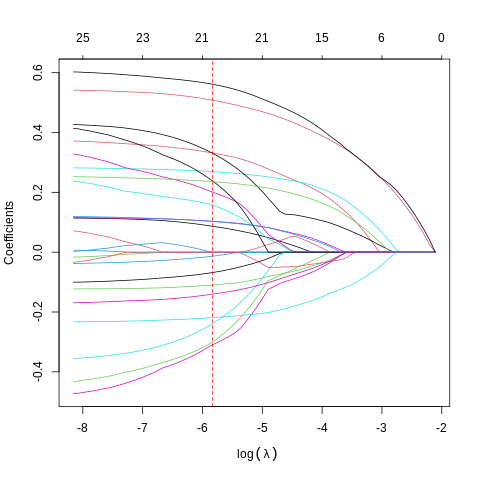

In [42]:
%%R

##Régression logistique avec régularisation ridge 
glmn2.0 <- glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
                  y = TRAIN.df[,"STATUT"], alpha = 1, family = "binomial")

#Visualisation: évolution des coefficients selon valeur de lambda avec régularisation lasso + ligne rouge indiquant le lambda optimal
plot(glmn2.0, xvar = "lambda", label = FALSE, xlab = ~log(lambda))
abline(v = log(cv.glmn2$lambda.min), lty = 2, col = "red")

La validation croisé a été appliquée pour trouver le paramètre λ optimal. On fait une prédiction basée sur ce modèle et on compare au vrai statut de décrochage dans les données d'entrainement.

In [44]:
%%R

#Prédiction à l'aide de la régression logistique avec régularisation ridge
glmn2p <- predict(cv.glmn2, newx = TRAIN.df[,var.model] %>%
                  as.matrix, s = "lambda.min")

#Table de classification montrant la performance prédictive du modèle
cv3 <- table(1*(glmn2p>0), TRAIN.df$STATUT)
cv3
prop.table(cv3)*100

   
           0        1
  0 34.57143 14.85714
  1 15.28571 35.28571


In [45]:
%%R
#Résumé du pourcentage de bonnes classifications
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv3)))*100)

[1] "69.9% de bonne classification"


On complète finalement avec la régularisation elastic-net, qui combine les deux méthodes précédentes. Pour cette dernière section, on veut calculer un compromis entre le modèle lasso et le modèle ridge. Il faut donc estimer un paramètre supplémentaire (α ∈ (0, 1)).

In [46]:
%%R

#Ajustement de la matrice
layout(matrix(1:10,3,3, byrow = TRUE))

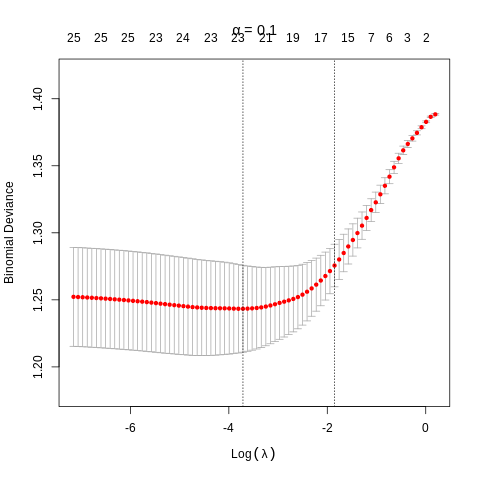

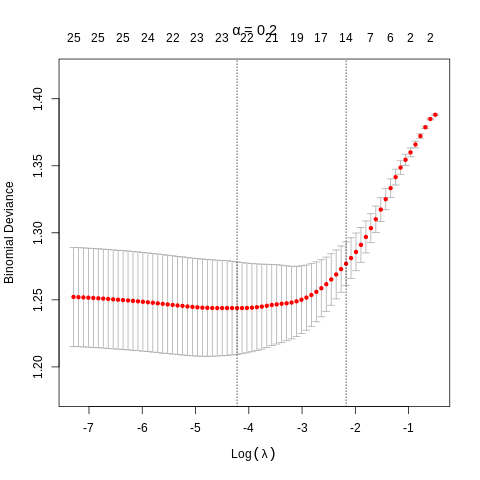

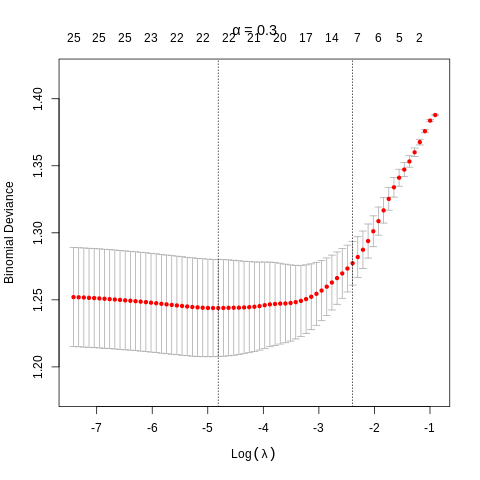

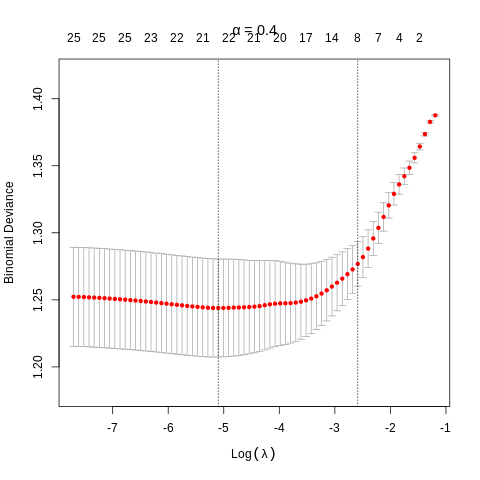

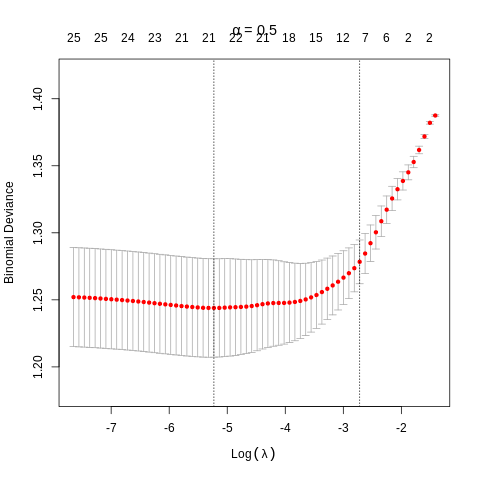

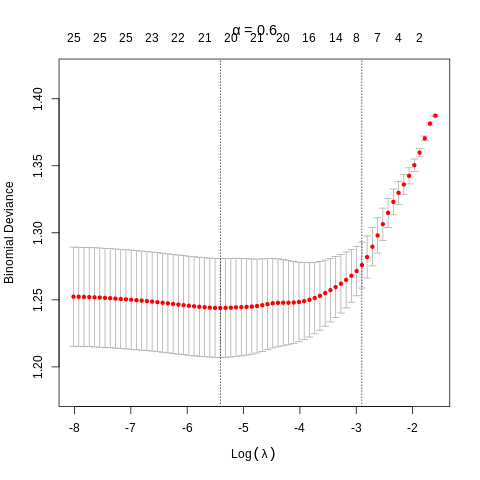

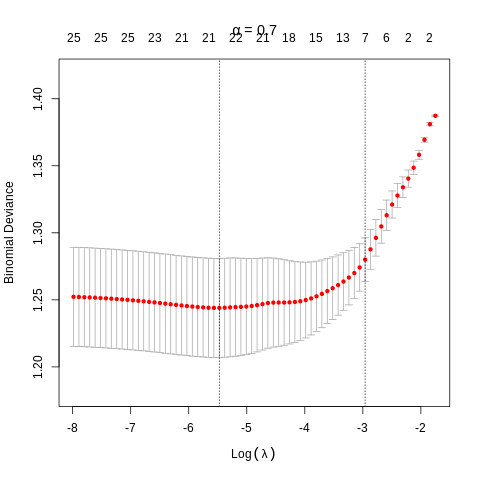

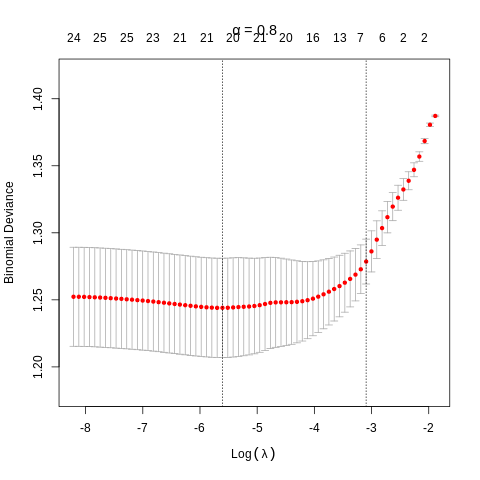

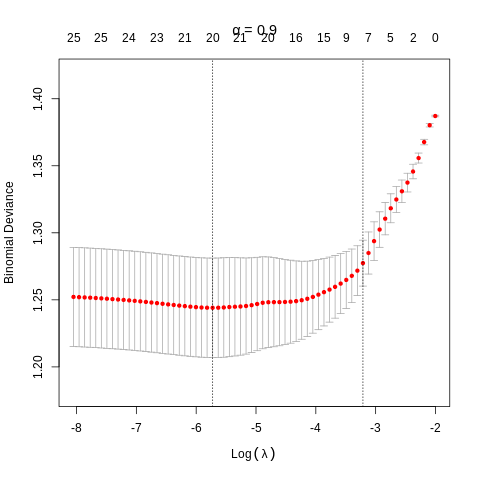

In [47]:
%%R

#Validation croisée à 10-plis pour obtention de la valeur optimale de lambda selon la valeur d'alpha (au dixième près)
cv.glmn3 <- list()

for(al in seq(0.1,0.9,0.1)){
    cv.glmn3[[sprintf("%.1f",al)]] <-
    cv.glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
    y = TRAIN.df[,"STATUT"], nfolds = 10, foldid = PARTITION,
    alpha = al, family = "binomial")
plot(cv.glmn3[[sprintf("%.1f",al)]],
main = latex2exp::TeX(sprintf("$\\alpha = %.1f$",al)), ylim = c(1.18, 1.42))
}

In [48]:
%%R

#Résumé: lambda optimal pour chaque valeur d'alpha
layout (1)
lapply(cv.glmn3, function(x) c(x$cvm[x$lambda == x$lambda.min],
+ x$cvsd[x$lambda == x$lambda.min]))

$`0.1`
[1] 1.24334596 0.03240747

$`0.2`
[1] 1.24380465 0.03446807

$`0.3`
[1] 1.24387059 0.03614771

$`0.4`
[1] 1.24390553 0.03652575

$`0.5`
[1] 1.24393115 0.03668735

$`0.6`
[1] 1.24394632 0.03684874

$`0.7`
[1] 1.24399564 0.03693823

$`0.8`
[1] 1.24402662 0.03701833

$`0.9`
[1] 1.24406738 0.03707612



In [49]:
%%R

##Régression logistique avec régularisation elastic-net (lambda et alpha choisis par validation croisée précédemment) 
glmn3 <- glmnet(x = TRAIN.df[,var.model] %>% as.matrix,
          y = TRAIN.df[,"STATUT"], alpha = 0.1, family = "binomial",
          lambda = cv.glmn3[[9]]$lambda.min)


In [50]:
%%R

#Prédiction à l'aide de la régression logistique avec régularisation elastic-net
glmn3p <- predict(cv.glmn3[[9]], newx = TRAIN.df[,var.model] %>% as.matrix)

#Table de classification montrant la performance prédictive du modèle
cv4 <- table(1*(glmn3p>0), TRAIN.df$STATUT)
cv4
prop.table(cv4)*100


   
           0        1
  0 34.28571 16.71429
  1 15.57143 33.42857


In [51]:
%%R
#Résumé du pourcentage de bonnes classifications
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cv4)))*100)

[1] "67.7% de bonne classification"


###Validation des modèles avec l'échantillon test

On prend maintenant l’échantillon de test et on valide nos prédictions basées sur le modèle construit avec l’échantillon d’entraînement.

In [53]:
%%R

#Prédiction avec les données test à partir de chaque modèle créé ci-haut
glm1tp <- predict(glm1, newx = TEST.df[,var.model] %>% as.matrix, s = "lambda.min")
glmn1tp <- predict(cv.glmn1, newx = TEST.df[,var.model] %>% as.matrix, s = "lambda.min")
glmn2tp <- predict(cv.glmn2, newx = TEST.df[,var.model] %>% as.matrix, s = "lambda.min")
glmn3tp <- predict(cv.glmn3[[9]], newx = TEST.df[,var.model] %>%as.matrix, s = "lambda.min")

#Table de classification résumant la performance du modèle additif sur les données test
cvt1 <- table(1*(glm1tp>0), TEST.df$STATUT)
cvt1
prop.table(cvt1)*100
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt1)))*100)

[1] "66.7% de bonne classification"


In [54]:
%%R

#Table de classification résumant la performance du modèle avec régularisation ridge sur les données test
cvt2 <- table(1*(glm1tp>0), TEST.df$STATUT)
cvt2
prop.table(cvt2)*100
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt2)))*100)

[1] "66.7% de bonne classification"


In [55]:
%%R

#Table de classification résumant la performance du modèle avec régularisation lasso sur les données test
cvt3 <- table(1*(glmn2tp>0), TEST.df$STATUT)
cvt3
prop.table(cvt3)*100
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt3)))*100)

[1] "67.0% de bonne classification"


In [56]:
%%R

#Table de classification résumant la performance du modèle avec régularisation elastic-net sur les données test
cvt4 <- table(1*(glmn3tp>0), TEST.df$STATUT)
cvt4
prop.table(cvt4)*100
sprintf("%.1f%% de bonne classification", sum(diag(prop.table(cvt4)))*100)

[1] "67.0% de bonne classification"


In [57]:
%%R

#Bootstrap
set.seed(1234)
good.class <- function(model, i ){
            if("glm" %in% class(model)){
            glm1tp <- predict(glm1, newdata = TEST.df[i,])
            cvt1 <- table(1*(glm1tp>0), TEST.df$STATUT[i])
            sum(diag(prop.table(cvt1)))*100
}
  else {glmn3tp <- predict(model,
                           newx = TEST.df[i,var.model] %>% as.matrix, s = "lambda.min")
  (cvt4 <- table(1*(glmn3tp>0), TEST.df$STATUT)) %>%
sum(diag(prop.table(cvt4)))*100
  }
}

sd(replicate(1000,good.class(glm1, sample(1:300, 300, TRUE))))

[1] 2.860233


In [58]:
%%R

#Tableau de comparaison des coefficients de chaque modèle
length(drop(coef(cv.glmn3[[6]],
       s = "lambda.min",allCoef = TRUE)))

coef(cv.glmn3[[6]], s = "lambda.min",allCoef = TRUE)

cf <- data.frame(VAR = c("Int.", var.model),
                 OLS = drop(coef(glm1,s = "lambda.min",allCoef = TRUE)),
                 RIDGE = drop(coef(cv.glmn1,s = "lambda.min",allCoef = TRUE)),
                 LASSO = drop(coef(cv.glmn2,s = "lambda.min",allCoef = TRUE)),
                 `ELASTIC NET` = drop(coef(cv.glmn3[[6]],
                                           s = "lambda.min",allCoef = TRUE)))
kable(cf, digits = 2,row.names = FALSE)




|VAR           |   OLS| RIDGE| LASSO| ELASTIC.NET|
|:-------------|-----:|-----:|-----:|-----------:|
|Int.          |  0.01|  0.01|  0.01|        0.01|
|MALE          |  0.12|  0.09|  0.09|        0.09|
|AGE           |  0.38|  0.26|  0.33|        0.33|
|PAR_IMM       | -0.02|  0.01|  0.00|        0.00|
|MINORITY      |  0.01|  0.00|  0.00|        0.00|
|SCOLMAX       |  0.28|  0.24|  0.27|        0.27|
|TRAVAILM      |  0.12|  0.10|  0.10|        0.10|
|TRAVAILP      | -0.11| -0.07| -0.07|       -0.07|
|PAR_SEP       |  0.55|  0.45|  0.51|        0.50|
|ADAPT         | -0.12| -0.10| -0.11|       -0.11|
|SRDQ          | -0.04| -0.02| -0.01|       -0.01|
|EVDISTSEV     |  0.26|  0.10|  0.16|        0.16|
|EVDISTMOD     | -0.50| -0.19| -0.31|       -0.30|
|SEVER03DICO   |  0.43|  0.24|  0.33|        0.32|
|SEVER36DICO   | -0.06|  0.05|  0.00|        0.00|
|SEVER69DICO   | -0.46| -0.19| -0.30|       -0.29|
|SEVER912DICO  | -0.01|  0.05|  0.00|        0.00|
|MODER203DICO  | -0.37| -0.14

Résumé de la performance des différents modèles:

    Modèle additif de régression linéaire classique: 
      Performance de 70.1% avec les données d'entrainement
      Performance de 66.7% avec les données de test
    Régression linéaire avec régularisation ridge: 
      Performance de 70.6% avec les données d'entrainement
      Performance de 66.7% avec les données de test
    Régression linéaire avec régularisation lasso: 
      Performance de 69.9% avec les données d'entrainement
      Performance de 67% avec les données de test
    Régression linéaire avec régularisation elastic-net: 
      Performance de 67.7% avec les données d'entrainement
      Performance de 67% avec les données de test